In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [192]:
df = pd.read_csv('Chip_Quality')
df.head()

,a,b,p
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [193]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


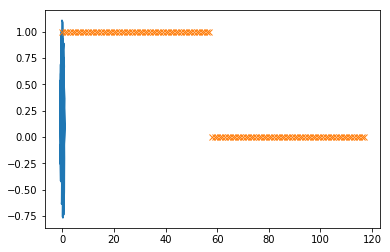

In [194]:
plt.plot(df['c1'],df['c2'],df['res'],'x')
#plt.ylabel("Price")
plt.show()

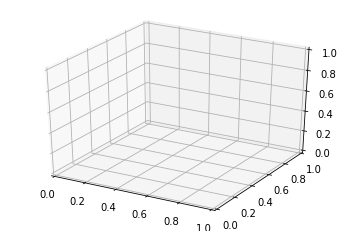

In [195]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [196]:
x1 = np.multiply(df['c1'],df['c1'])
x1 = np.array(x1)
x1 = np.reshape(x1,(x1.shape[0],1))
x2 = np.multiply(df['c2'],df['c2'])
x2 = np.array(x2)
x2 = np.reshape(x2,(x2.shape[0],1))
df = df.assign(c3=x1, c4 = x2)
df.head()

,c1,c2,res,c3,c4
0,0.051267,0.69956,1,0.002628,0.489384
1,-0.092742,0.68494,1,0.008601,0.469143
2,-0.213710,0.69225,1,0.045672,0.479210
3,-0.375000,0.50219,1,0.140625,0.252195
4,-0.513250,0.46564,1,0.263426,0.216821


In [197]:
df.shape

(118, 5)

In [198]:
df.describe(include='all')

,c1,c2,res,c3,c4
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525,0.247575,0.301370
std,0.496654,0.519743,0.502060,0.248532,0.284536
min,-0.830070,-0.769740,0.000000,0.000040,0.000026
25%,-0.372120,-0.254385,0.000000,0.043243,0.061086
50%,-0.006336,0.213455,0.000000,0.165397,0.252195
75%,0.478970,0.646562,1.000000,0.389925,0.464189
max,1.070900,1.108900,1.000000,1.146827,1.229659


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
c1     118 non-null float64
c2     118 non-null float64
res    118 non-null int64
c3     118 non-null float64
c4     118 non-null float64
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [200]:
df.corr()

,c1,c2,res,c3,c4
c1,1.000000,-0.138709,-0.074115,0.378070,-0.007324
c2,-0.138709,1.000000,0.005697,-0.114382,0.594471
res,-0.074115,0.005697,1.000000,-0.389963,-0.247882
c3,0.378070,-0.114382,-0.389963,1.000000,-0.344834
c4,-0.007324,0.594471,-0.247882,-0.344834,1.000000


In [201]:
df['c1'] = (df['c1']-df['c1'].mean())/df['c1'].std()
df['c2'] = (df['c2']-df['c2'].mean())/df['c2'].std()
df['c3'] = (df['c3']-df['c3'].mean())/df['c3'].std()
df['c4'] = (df['c4']-df['c4'].mean())/df['c4'].std()
x = df[['c1','c2','c3','c4']] 
#x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train

In [202]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (82, 4)
y.shape: (82,)
m: 82
n: 4
x.shape after appending a column for bias: (82, 5)


In [203]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[-0.4812814 ],
        [ 0.45386928],
        [ 1.49865698],
        [-1.70548128],
        [ 0.51334973]]), (5, 1))

In [204]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [205]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

1.0572468428267807

In [214]:
alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
J_prev = 100
J=0
iterations = 0
t = 10000
log = np.array([])
while(abs(J_prev-J) > 0.0000001):
    z = np.matmul(x,w)
    h = 1/(1 + np.exp(-z))
    for i in range(n+1):
        temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[i,:] = temp[i]
    #print(w)
    #print(np.matmul(h-y,(h-y).T))
    J_prev = J
    w1 = np.log(1/(1 + np.exp(-z)))
    w2 = np.log(1-(1/(1 + np.exp(-z))))
    J = (-1/m)*np.sum(y*w1 + (1-y)*w2)
    #print(J)
    log = np.append(log, J)
    iterations+=1

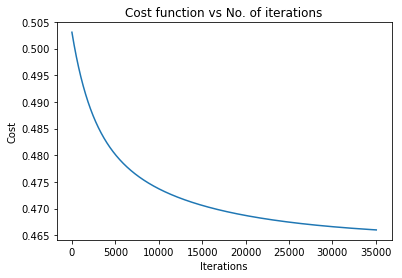

In [215]:
it = np.arange(iterations)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [216]:
print("Minimum Loss: " + str(log.min()))

Minimum Loss: 0.46599546271091535


In [217]:
J

0.46599546271091535

In [218]:
iterations

35060

In [219]:
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
z = np.matmul(X_test,w)
y_pred = 1/(1 + np.exp(-z))
i=0
cnt=0
for i in range(X_test.shape[0]):
    if( abs(y_pred[i] - y_test[i]) < 0.5):
        cnt = cnt+1
cnt

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 6)

In [220]:
X_test.shape

(36, 6)

In [221]:
accuracy = (cnt/y_test.shape[0])*100
accuracy

80.55555555555556

# Using Regularisation

In [223]:
df.head()

,c1,c2,res,c3,c4
0,-0.007071,0.993681,1,-0.985574,0.660775
1,-0.297030,0.965551,1,-0.961542,0.589637
2,-0.540596,0.979616,1,-0.812383,0.625018
3,-0.865349,0.613935,1,-0.430328,-0.172824
4,-1.143712,0.543612,1,0.063775,-0.297147


In [224]:
df['c1'] = (df['c1']-df['c1'].mean())/df['c1'].std()
df['c2'] = (df['c2']-df['c2'].mean())/df['c2'].std()
df['c3'] = (df['c3']-df['c3'].mean())/df['c3'].std()
df['c4'] = (df['c4']-df['c4'].mean())/df['c4'].std()
x = df[['c1','c2','c3','c4']] 
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train

In [225]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
lamda = 25
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (82, 4)
y.shape: (82,)
m: 82
n: 4
x.shape after appending a column for bias: (82, 5)


In [226]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[-0.2577089 ],
        [ 1.13221448],
        [ 0.08909131],
        [ 0.84690842],
        [ 0.41701973]]), (5, 1))

In [227]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [228]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

1.3126202204785058

In [235]:
alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
J_prev = 100
J=0
iterations = 0
t = 10000
log = np.array([])
while(abs(J_prev-J) > 0.00000):
    z = np.matmul(x,w)
    h = 1/(1 + np.exp(-z))
    for i in range(n+1):
        temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0)) - alpha*lamda*(1/m)*w[i,:]
    for i in range(n+1):
        w[i,:] = temp[i]
    #print(w)
    #print(np.matmul(h-y,(h-y).T))
    J_prev = J
    w1 = np.log(1/(1 + np.exp(-z)))
    w2 = np.log(1-(1/(1 + np.exp(-z))))
    J = (-1/m)*np.sum(y*w1 + (1-y)*w2) + (1/(2*m))*lamda*np.sum(np.multiply(w,w))
    #print(J)
    log = np.append(log, J)
    iterations+=1

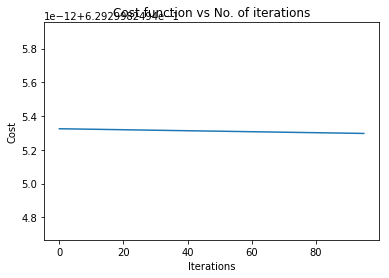

In [236]:
it = np.arange(iterations)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [237]:
print("Minimum Loss: " + str(log.min()))

Minimum Loss: 0.6292998249452972


In [238]:
iterations

96

In [239]:
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
z = np.matmul(X_test,w)
y_pred = 1/(1 + np.exp(-z))
i=0
cnt=0
for i in range(X_test.shape[0]):
    if( abs(y_pred[i] - y_test[i]) < 0.5):
        cnt = cnt+1
cnt

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 6)

In [240]:
accuracy = (cnt/y_test.shape[0])*100
accuracy

63.888888888888886